In [2]:
import os
import numpy as np
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from predict.plot_helper import PlotHelper
from predict.stat_tests import StatTestWrapper
from predict.transformations import TransformHelper
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
CSV_AQI_PATH = '../datasources/aqi_calc/'
POL_CODES = [7, 6001, 5, 10, 1, 8]
POL_NAMES = {7: "O3", 6001: "PM2.5", 5: "PM10", 10: "CO", 1: "SO2", 8: "NO2"}

In [4]:
def get_dataframes_for_pollutant(pollutant_id: int) -> dict[str, pd.DataFrame]:
    directory = os.path.join(CSV_AQI_PATH,  str(pollutant_id))
    df_dict = {}
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, parse_dates=True, index_col='DatetimeEnd')
        df_dict[filename[:filename.index('.')]] = df
    return df_dict

In [5]:
pollutant_id = 7
dfs = get_dataframes_for_pollutant(pollutant_id)

Временные ряды AQI. Период: ALL


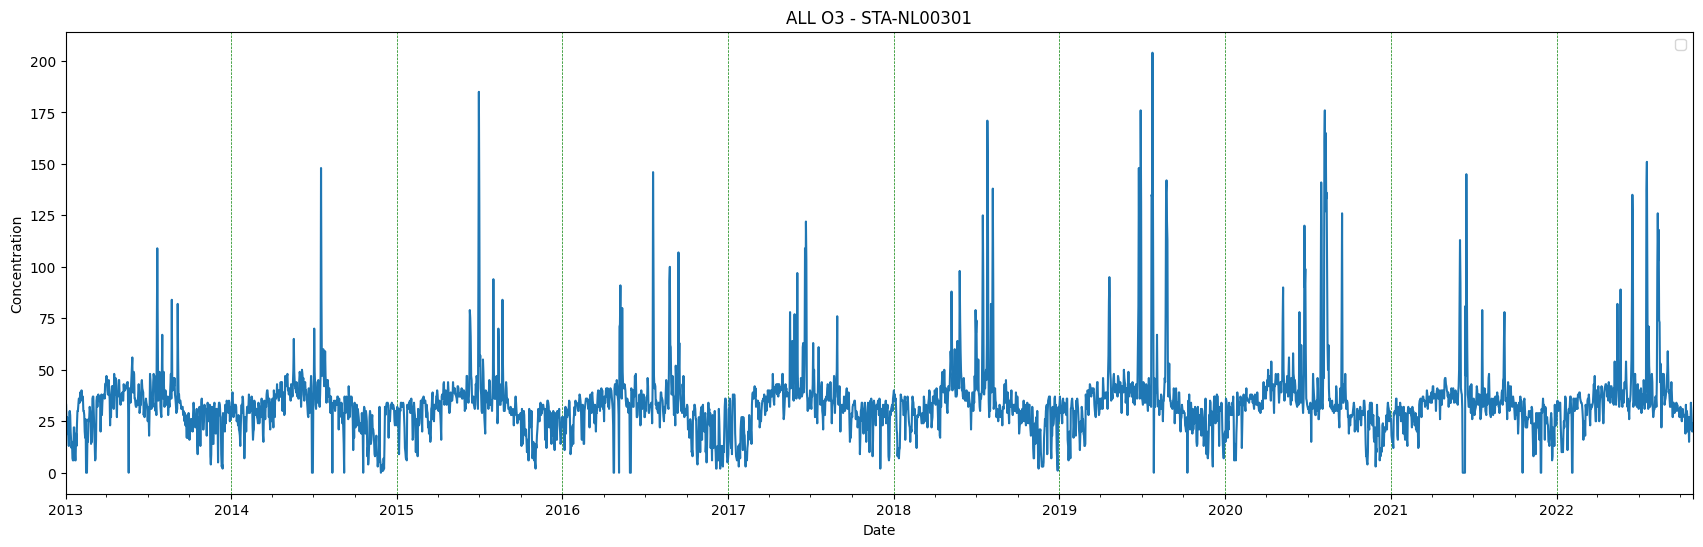

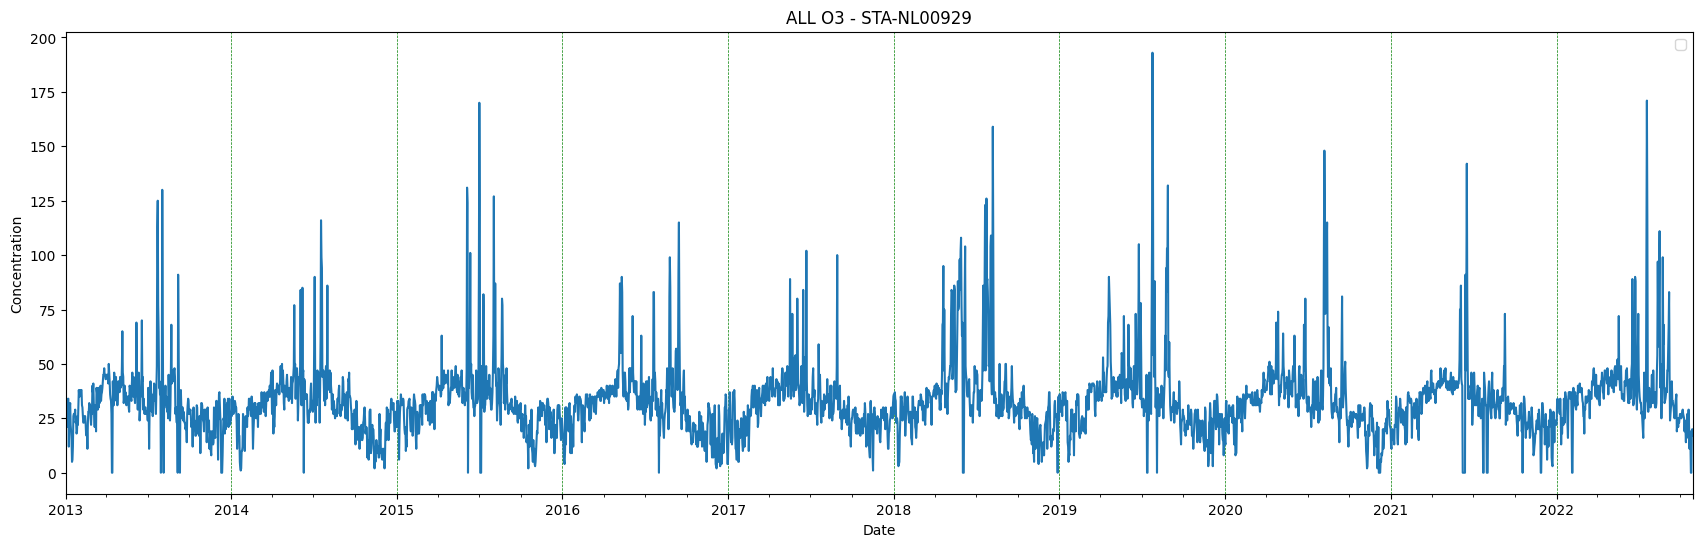

In [6]:
period_name = 'ALL'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}')

Временные ряды AQI. Период: YEAR


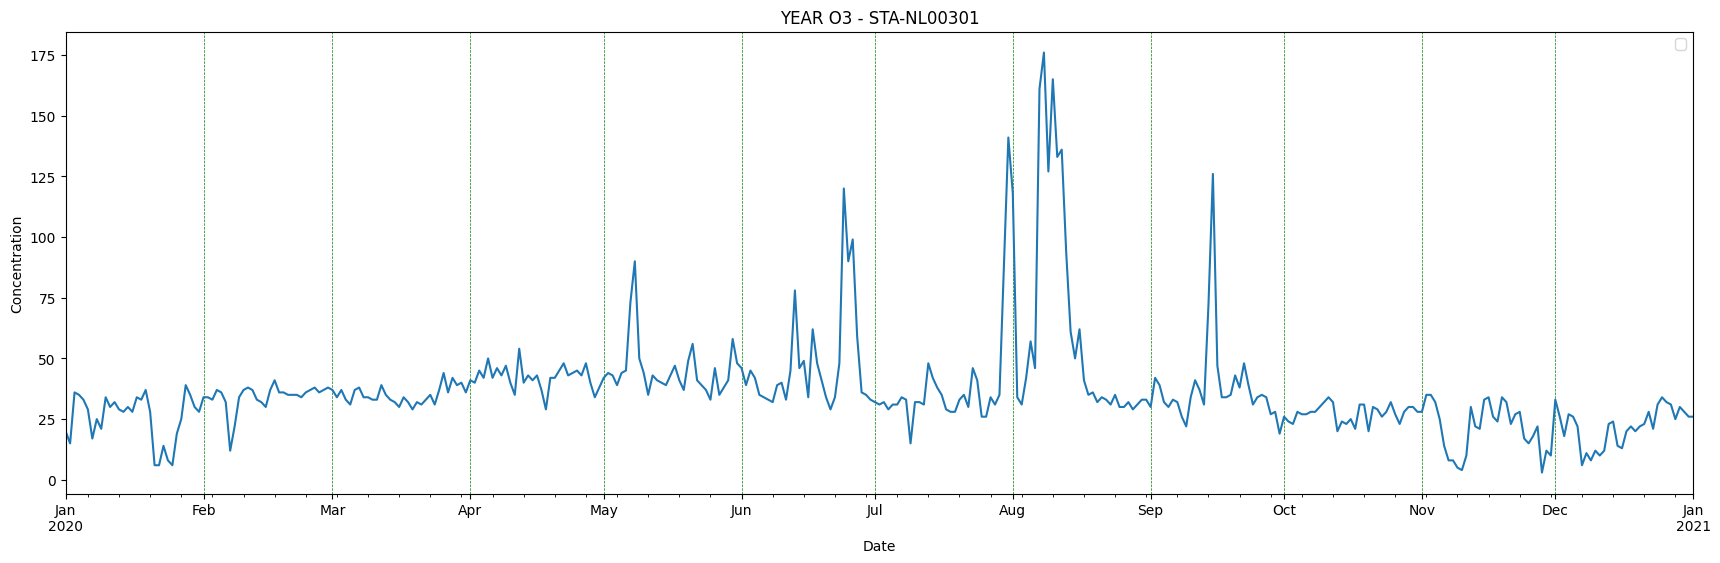

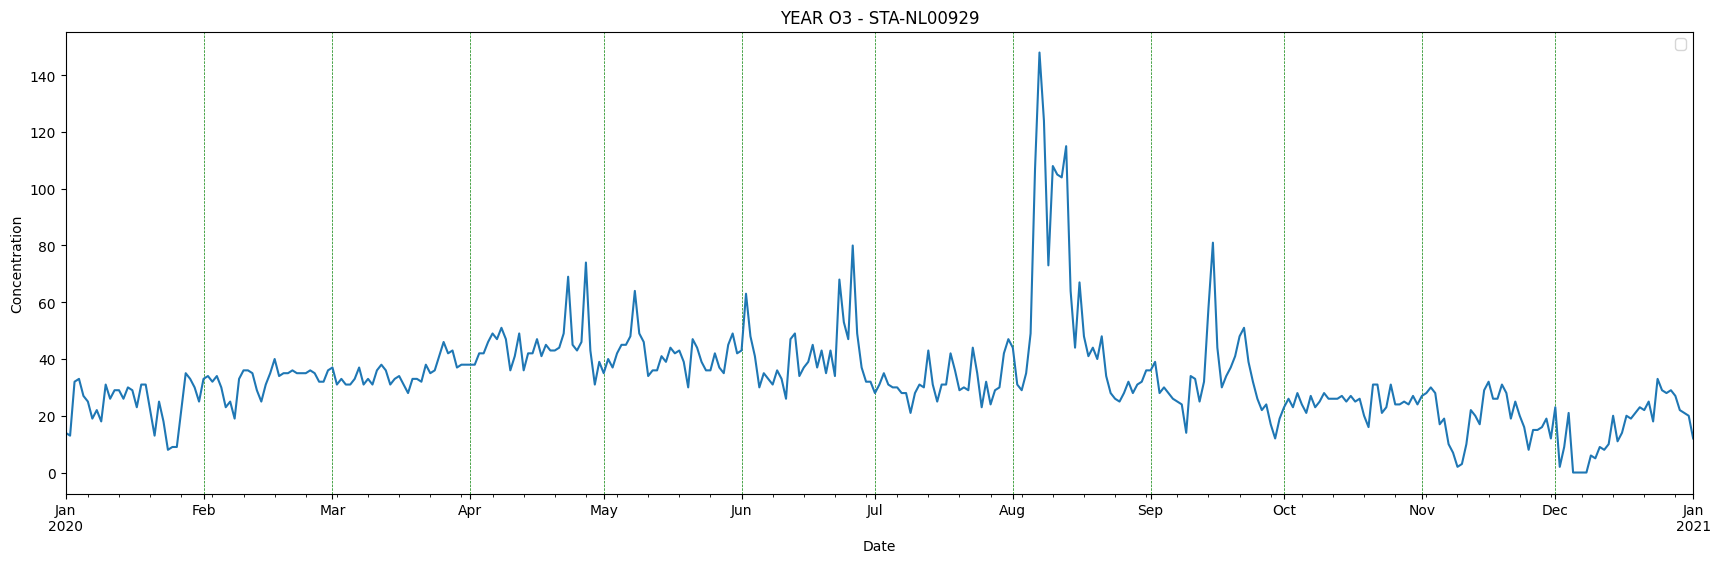

In [7]:
period_name = 'YEAR'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], date_from='2020-01-01', date_to='2021-01-01', title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}')

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - без дифференцирования
ADF Statistic: -5.670063677415606
p-value: 8.964762541064353e-07
maximal Lag: 29
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.3509117396894238
p-value: 0.09831390530628284
maximal Lag: 31
Critical Values:
Non-stationary


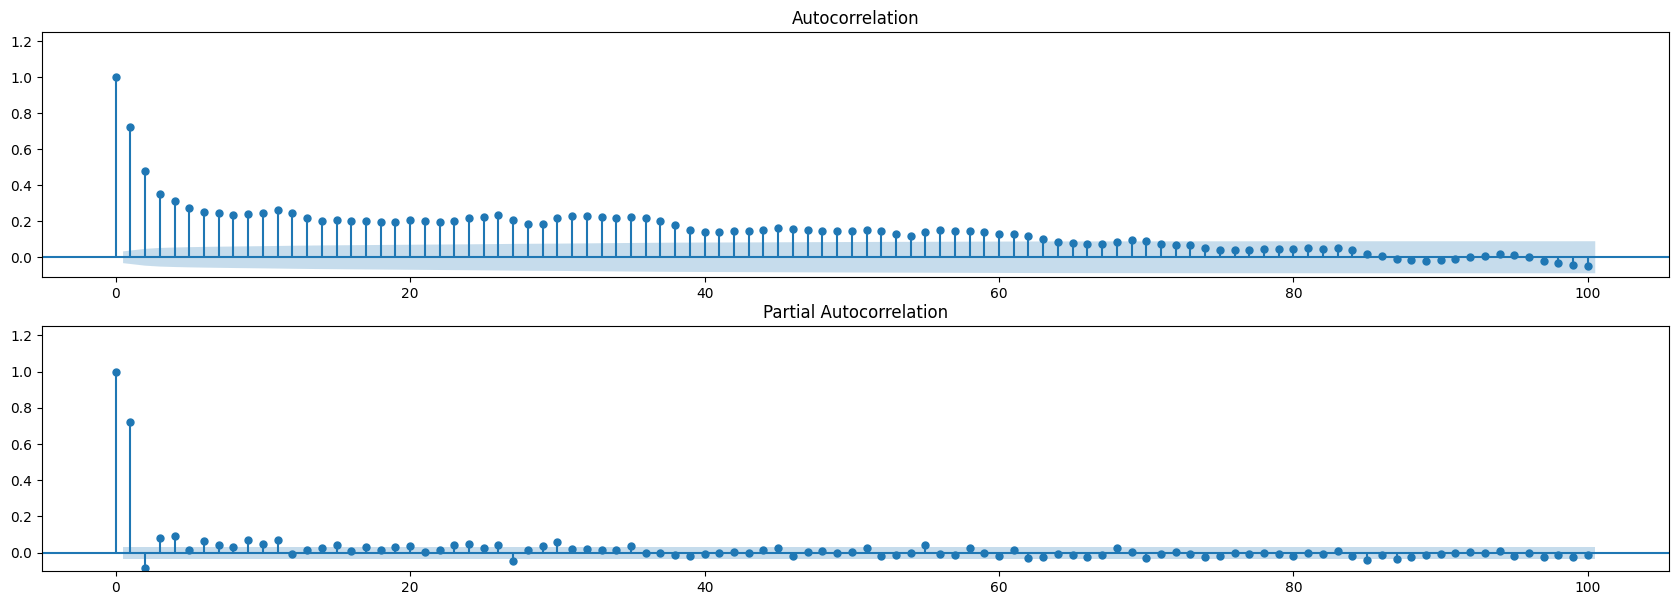

ADF Statistic: -5.297474771636021
p-value: 5.541990250818951e-06
maximal Lag: 30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.1143154660047849
p-value: 0.1
maximal Lag: 33
Critical Values:
Non-stationary


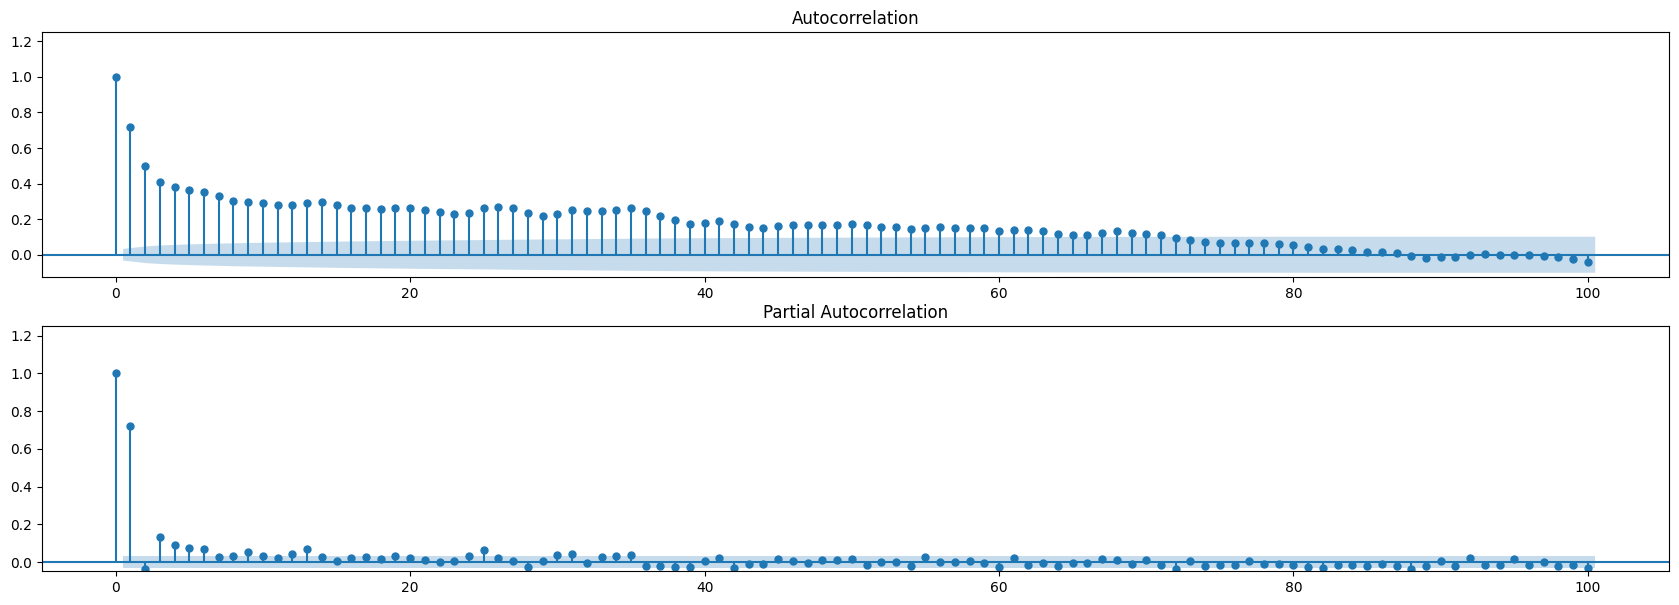

In [8]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - без дифференцирования')
for k in dfs.keys():
    StatTestWrapper.pre_analise(dfs[k], lags=100)

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по году
ADF Statistic: -11.325463577471679
p-value: 1.1464275429491411e-20
maximal Lag: 26
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.06681883620862916
p-value: 0.1
maximal Lag: 24
Critical Values:
Non-stationary


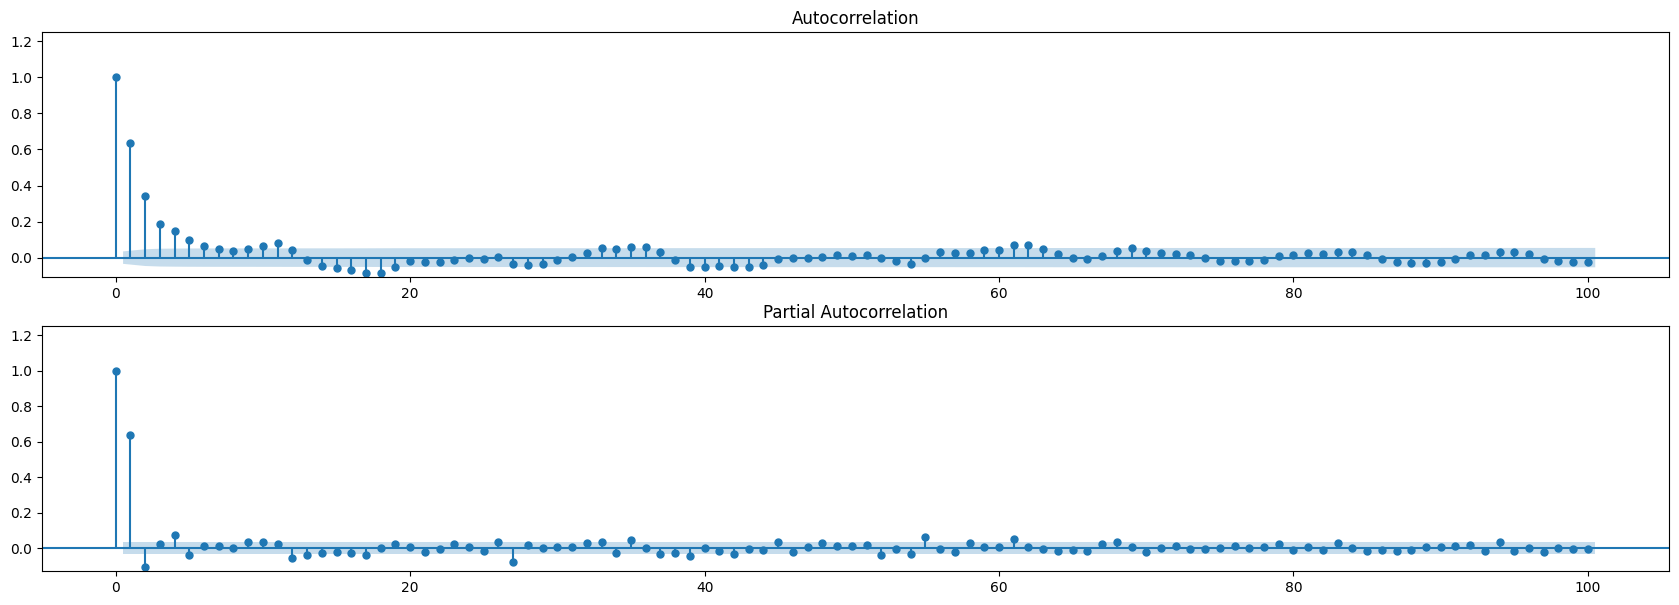

ADF Statistic: -16.962535053389157
p-value: 9.285458877877841e-30
maximal Lag: 6
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.07239898692240895
p-value: 0.1
maximal Lag: 25
Critical Values:
Non-stationary


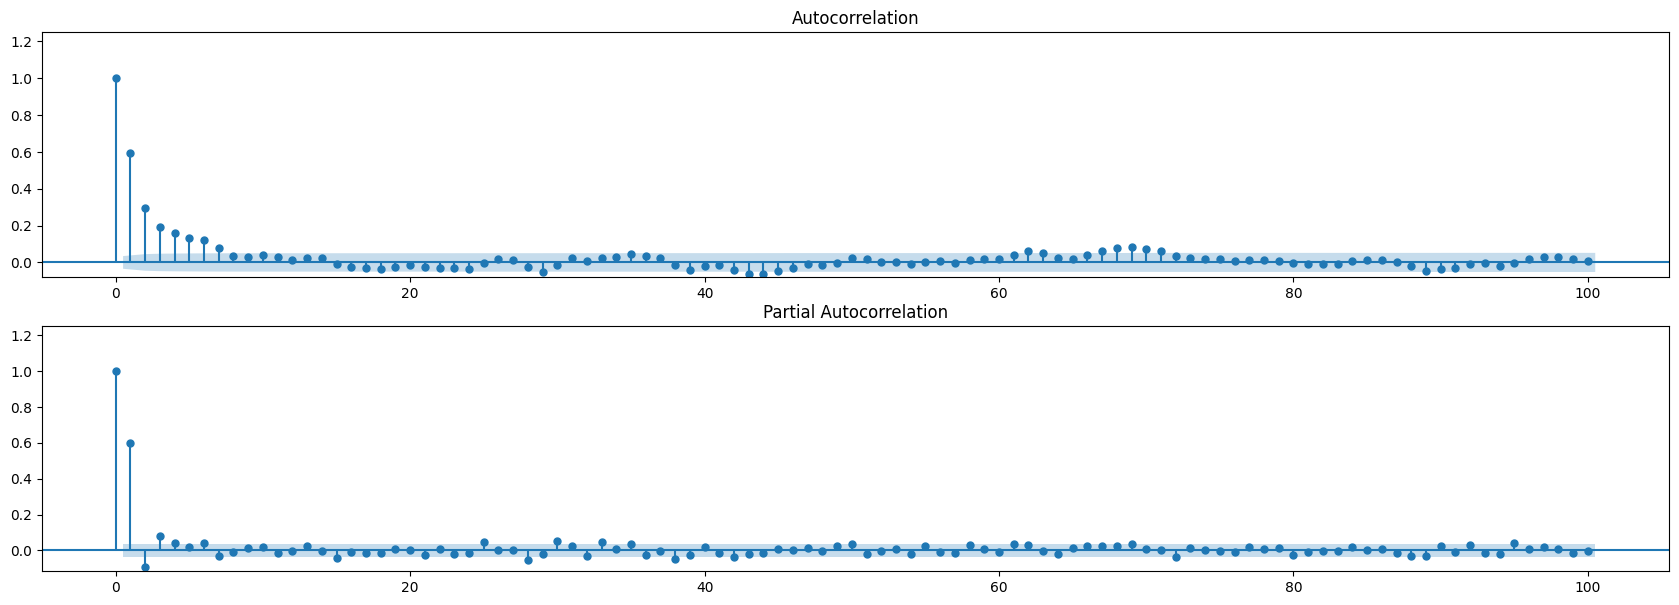

In [9]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по году')
for k in dfs.keys():
    StatTestWrapper.pre_analise(dfs[k], [('Y', 1)], lags=100)

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по году и дню
ADF Statistic: -17.184879458361873
p-value: 6.61008749205163e-30
maximal Lag: 29
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.04408559605879998
p-value: 0.1
maximal Lag: 218
Critical Values:
Non-stationary


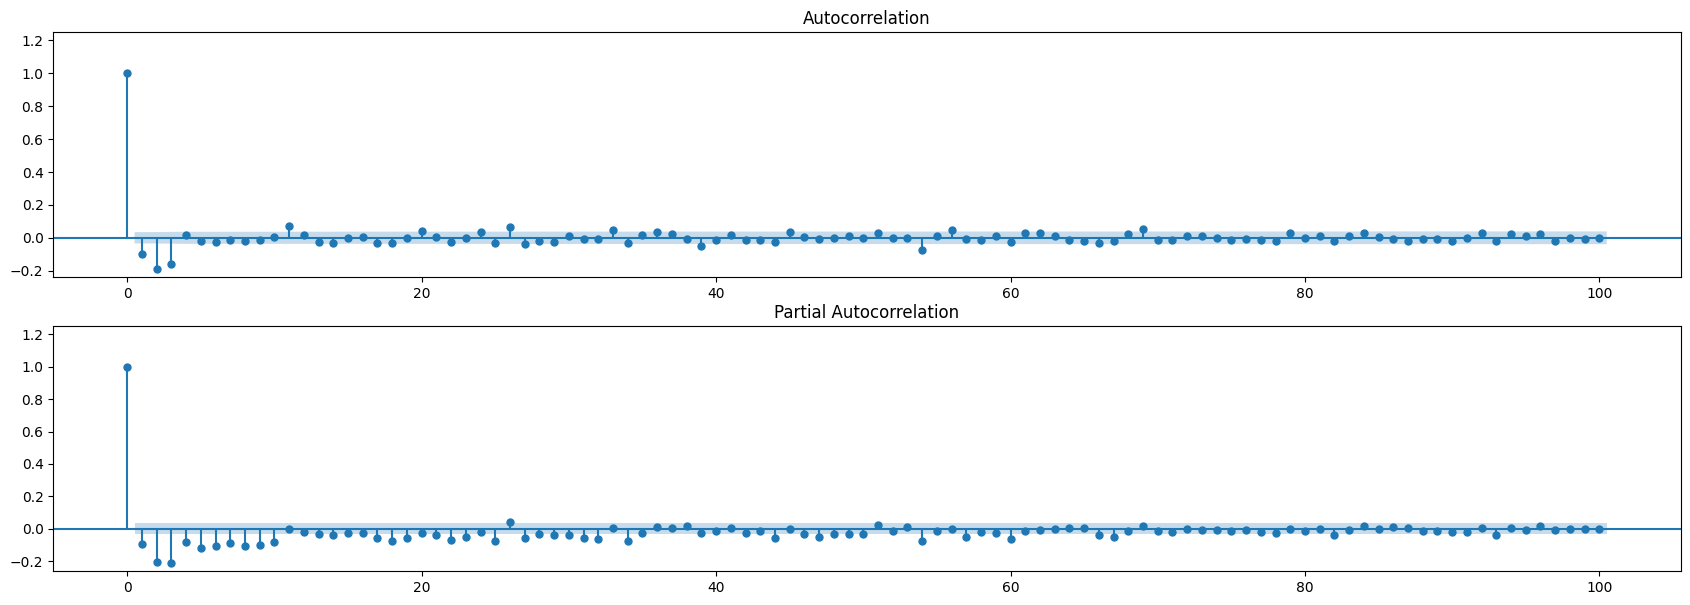

ADF Statistic: -17.3993767996492
p-value: 4.957119967146034e-30
maximal Lag: 29
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.019130717488920475
p-value: 0.1
maximal Lag: 100
Critical Values:
Non-stationary


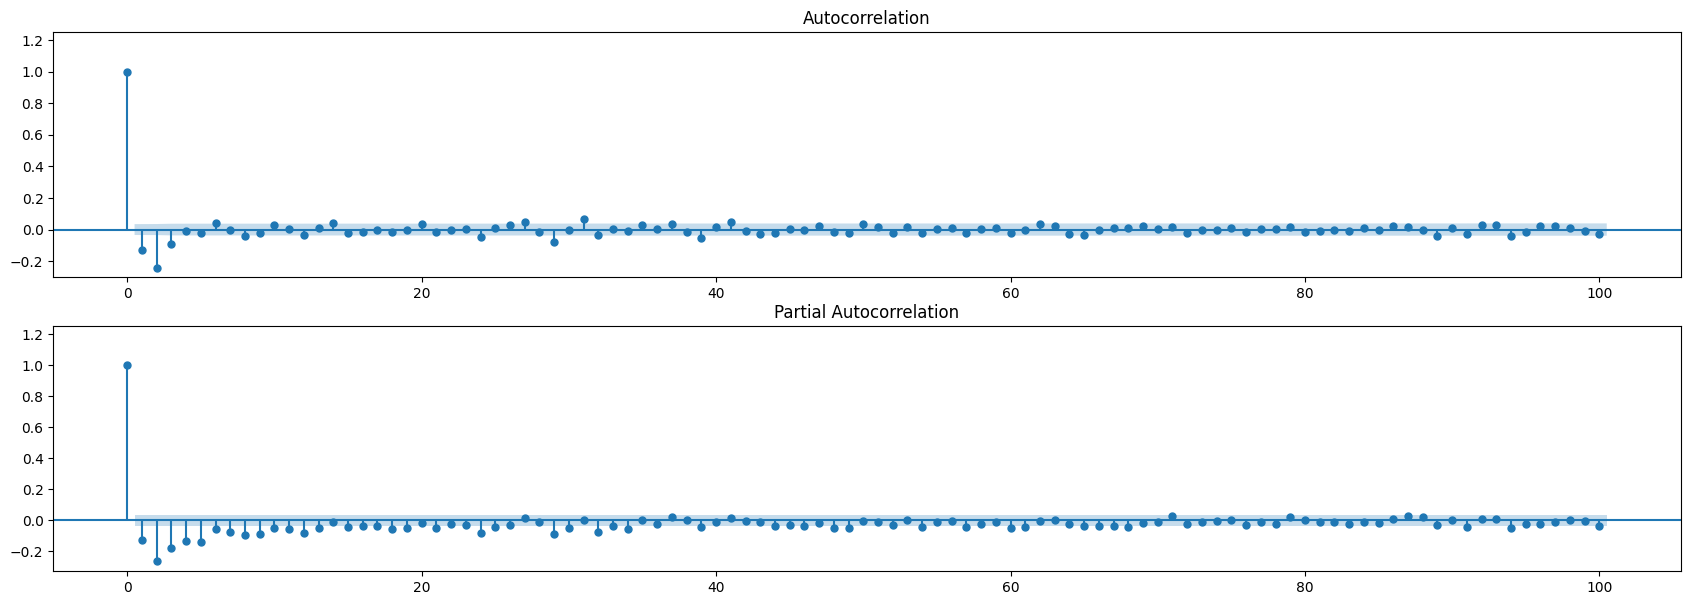

In [10]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по году и дню')
for k in dfs.keys():
    StatTestWrapper.pre_analise(dfs[k], [('Y', 1), ('D', 1)], lags=100)

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по неделе
ADF Statistic: -16.469417931646042
p-value: 2.2905361522111772e-29
maximal Lag: 28
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.004679504361754482
p-value: 0.1
maximal Lag: 13
Critical Values:
Non-stationary


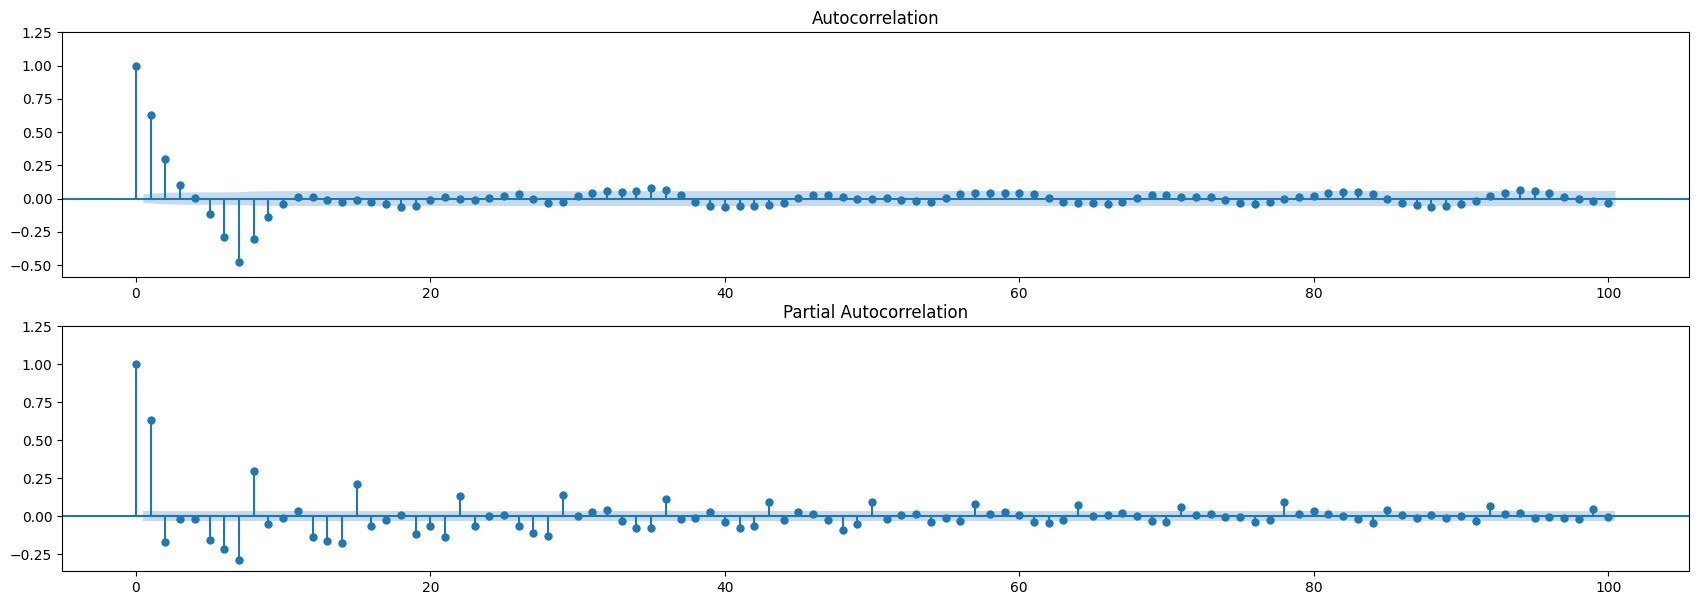

ADF Statistic: -14.048689972857673
p-value: 3.2063073961534045e-26
maximal Lag: 30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.006653409994165854
p-value: 0.1
maximal Lag: 2
Critical Values:
Non-stationary


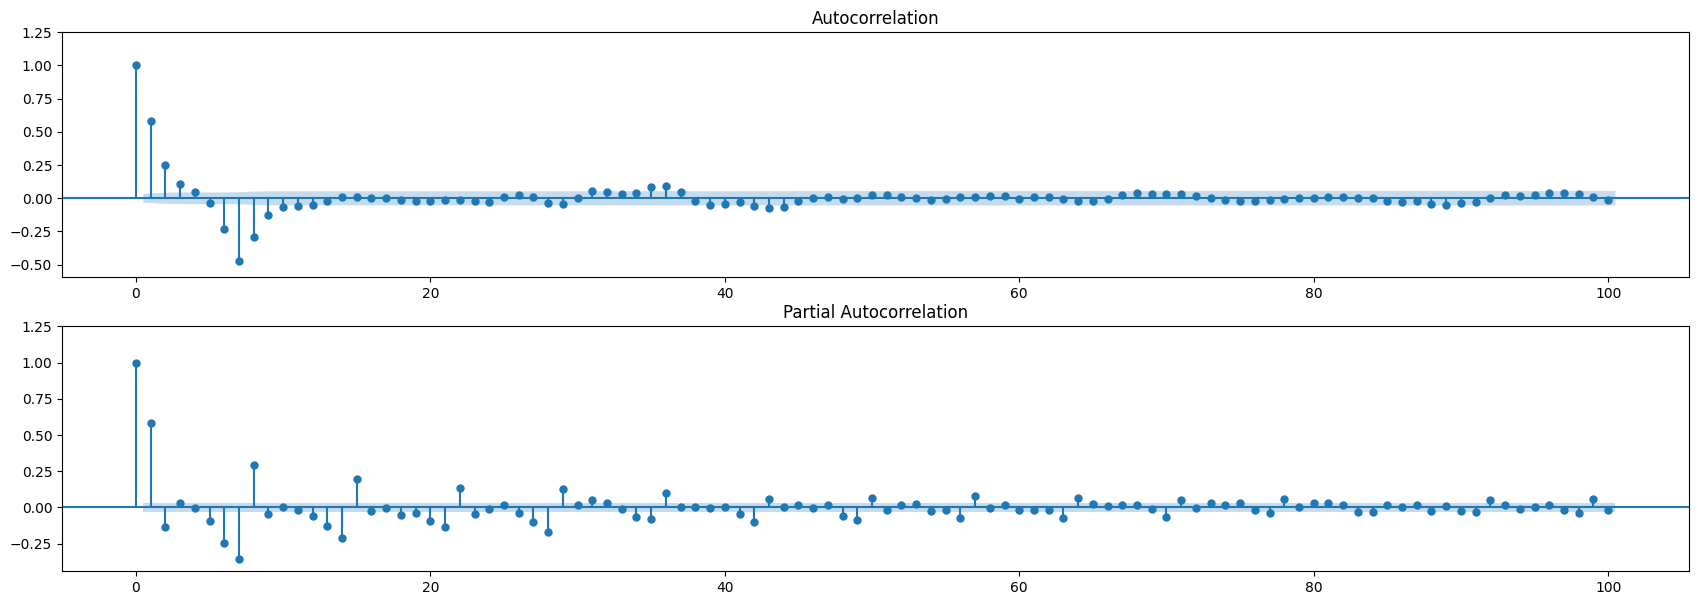

In [11]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по неделе')
for k in dfs.keys():
    StatTestWrapper.pre_analise(dfs[k], [('W', 1)], lags=100)

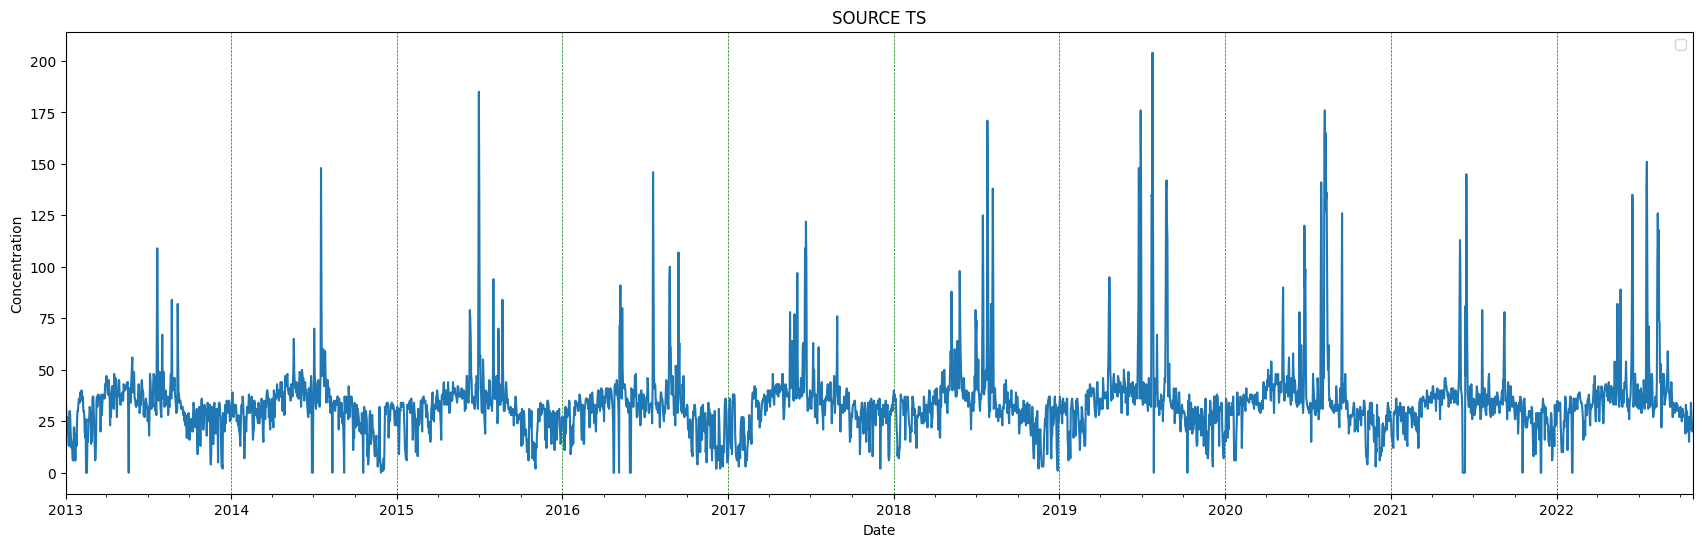

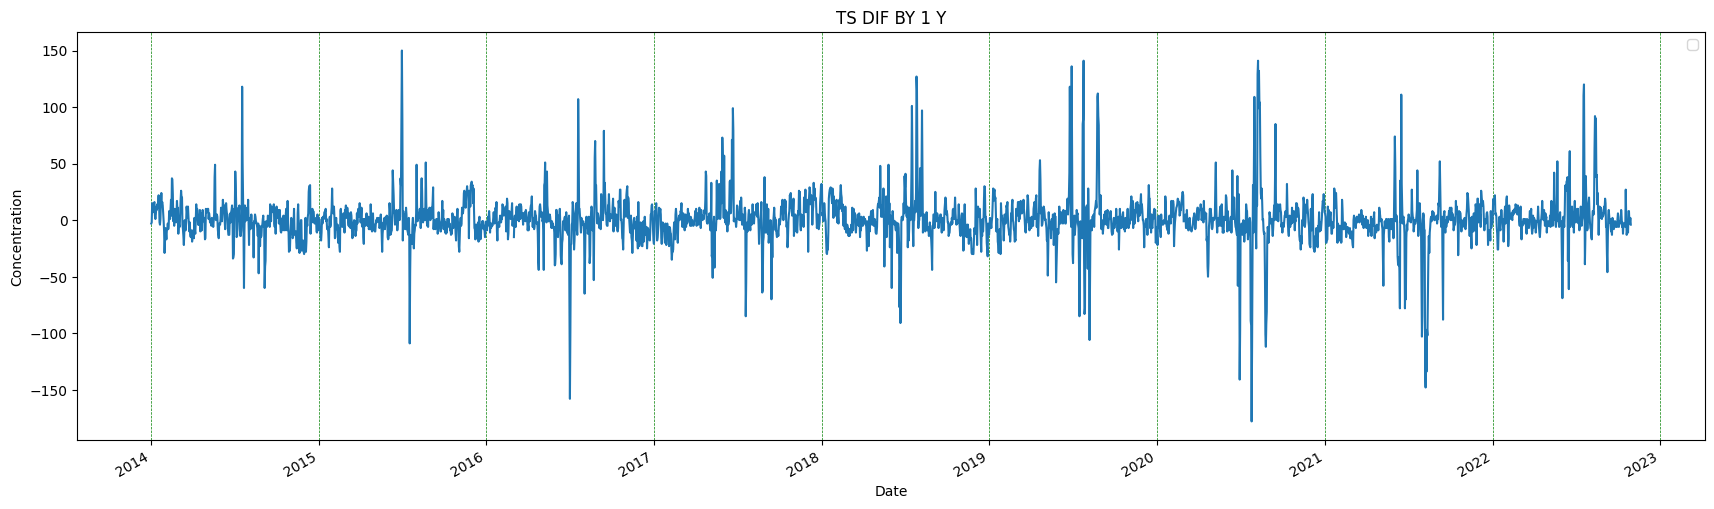

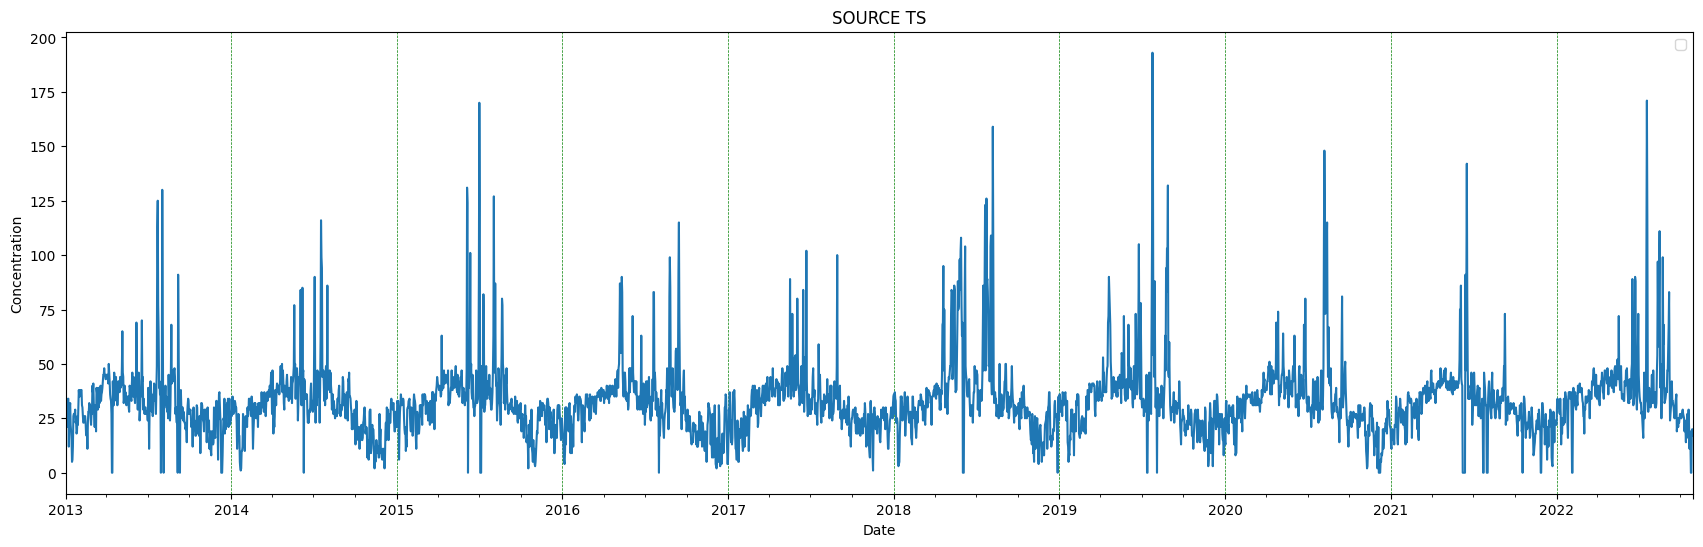

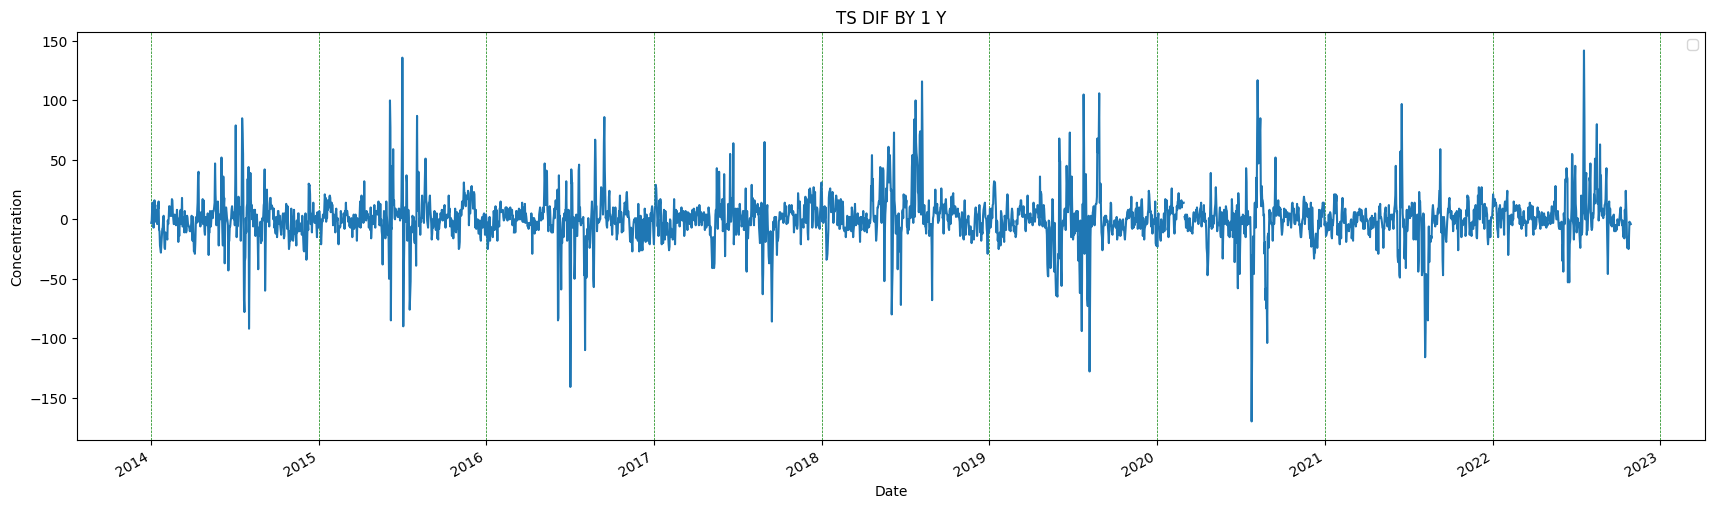

In [12]:
for k in dfs.keys():
    ts_n = TransformHelper.apply_differencing(ts=dfs[k], shift_type='Y', shift_value=1,
                                              source_plots_needed=True, dif_plot_needed=True)

In [13]:
import datetime

station0 = list(dfs.keys())[0]
dfs[station0].groupby([d.year for d in dfs[station0].index]).idxmax()

,AQI
2013,2013-07-22 00:00:00+01:00
2014,2014-07-18 00:00:00+01:00
2015,2015-07-01 00:00:00+01:00
2016,2016-07-19 00:00:00+01:00
2017,2017-06-21 00:00:00+01:00
2018,2018-07-26 00:00:00+01:00
2019,2019-07-25 00:00:00+01:00
2020,2020-08-08 00:00:00+01:00
2021,2021-06-16 00:00:00+01:00
2022,2022-07-19 00:00:00+01:00
